# Assignment 4
### 211091055 Gaytri Thakre

In [1]:
import pandas as pd
import numpy as np
import itertools 

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import power_transform
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import metrics


In [2]:
df = pd.read_csv(r'\DSA\Assignment 4\wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
#dropping columns

df.drop(['Type'],axis=1,inplace=True)

In [5]:
# duplicates checking 
df[df.duplicated(keep=False)]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


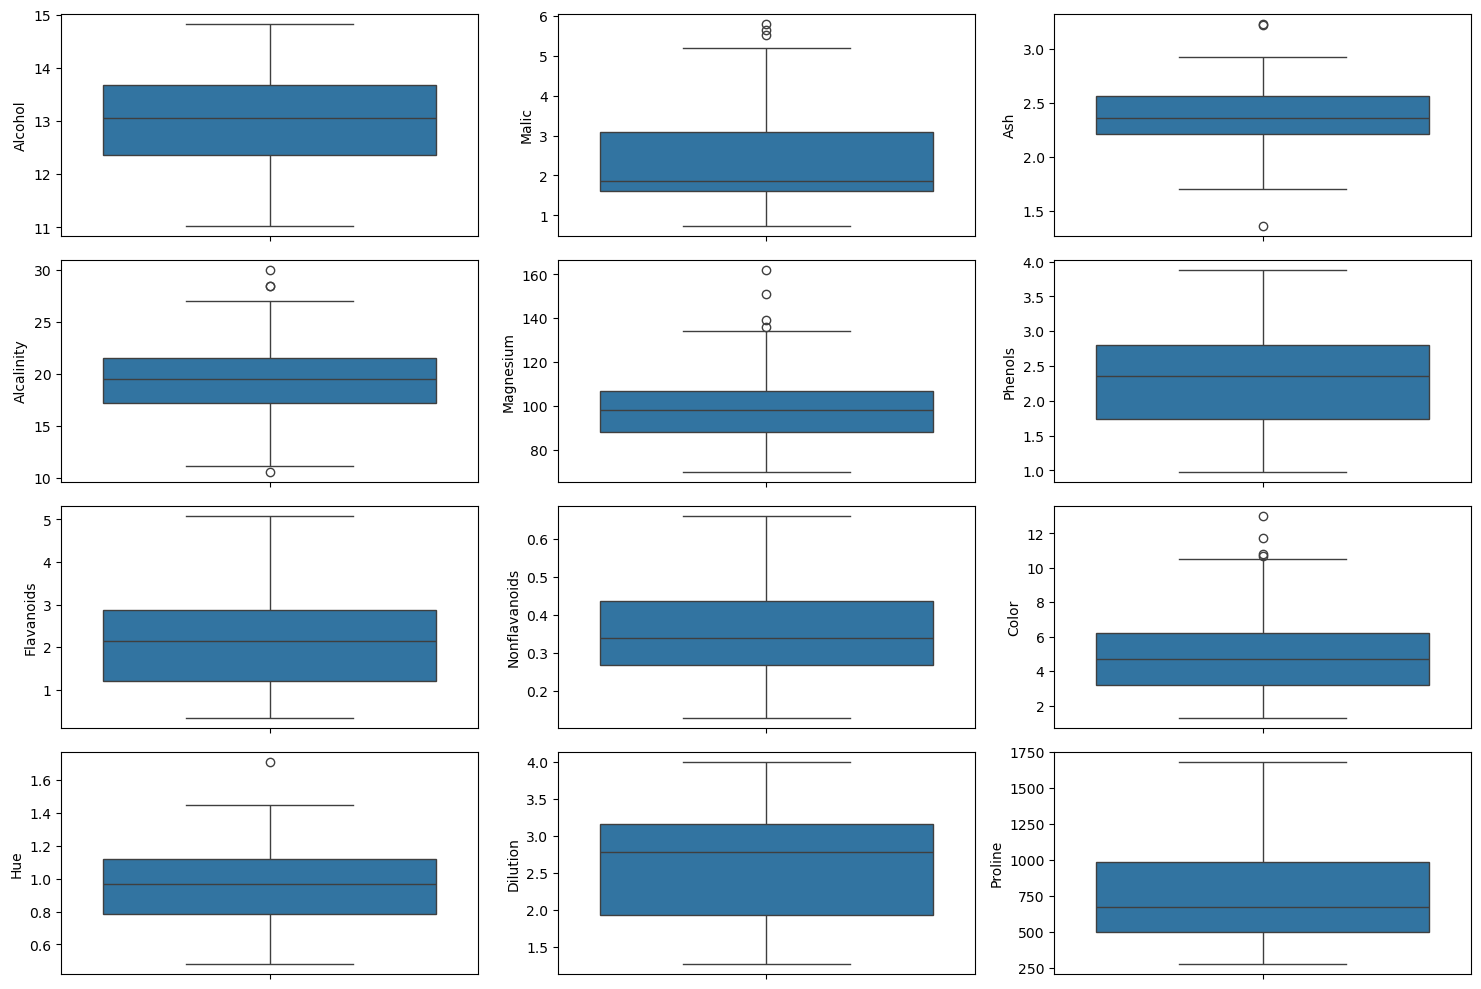

In [6]:
# using box plot
fig, ax = plt.subplots(4,3,figsize=(15,10))
sns.boxplot(df.Alcohol,ax=ax[0,0])
sns.boxplot(df.Malic,ax=ax[0,1])
sns.boxplot(df.Ash,ax=ax[0,2])
sns.boxplot(df.Alcalinity,ax=ax[1,0])
sns.boxplot(df.Magnesium,ax=ax[1,1])
sns.boxplot(df.Phenols,ax=ax[1,2])
sns.boxplot(df.Flavanoids,ax=ax[2,0])
sns.boxplot(df.Nonflavanoids,ax=ax[2,1])
sns.boxplot(df.Color,ax=ax[2,2])
sns.boxplot(df.Hue,ax=ax[3,0])
sns.boxplot(df.Dilution,ax=ax[3,1])
sns.boxplot(df.Proline,ax=ax[3,2])

plt.tight_layout()
plt.show()

C:\Users\HOME\AppData\Local\Temp\ipykernel_4524\2611155788.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Alcohol, ax=ax[0, 0])
C:\Users\HOME\AppData\Local\Temp\ipykernel_4524\2611155788.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Malic, ax=ax[0, 1])
C:\Users\HOME\AppData\Loca

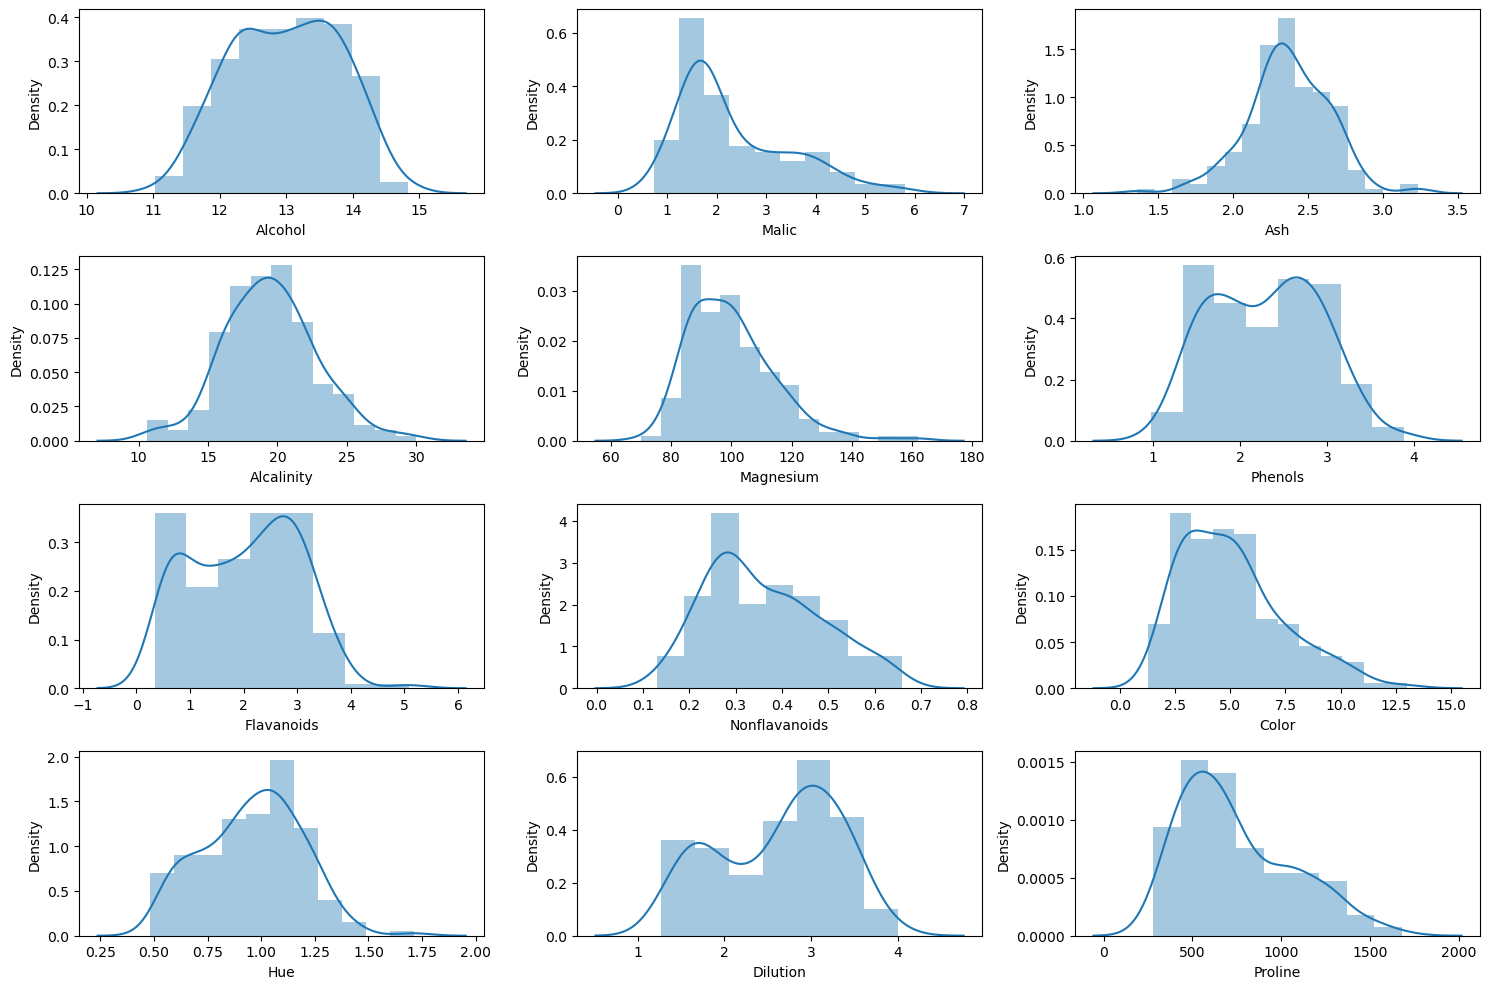

In [7]:
#using distplot

fig, ax = plt.subplots(4, 3, figsize=(15, 10))
sns.distplot(df.Alcohol, ax=ax[0, 0])
sns.distplot(df.Malic, ax=ax[0, 1])
sns.distplot(df.Ash, ax=ax[0, 2])
sns.distplot(df.Alcalinity, ax=ax[1, 0])
sns.distplot(df.Magnesium, ax=ax[1, 1])
sns.distplot(df.Phenols, ax=ax[1, 2])
sns.distplot(df.Flavanoids, ax=ax[2, 0])
sns.distplot(df.Nonflavanoids, ax=ax[2, 1])
sns.distplot(df.Color, ax=ax[2, 2])
sns.distplot(df.Hue, ax=ax[3, 0])
sns.distplot(df.Dilution, ax=ax[3, 1])
sns.distplot(df.Proline, ax=ax[3, 2])

plt.tight_layout()
plt.show()


In [8]:
df2 = df[['Alcohol',	'Malic',	'Ash',	'Alcalinity',	'Magnesium',	'Phenols',	'Flavanoids',	'Nonflavanoids',	'Proanthocyanins',	'Color',	'Hue',	'Dilution',	'Proline']]
df2_transformed = power_transform(df2,method='yeo-johnson')

In [9]:
df2 =pd.DataFrame(df2_transformed,columns=['Alcohol',	'Malic',	'Ash',	'Alcalinity',	'Magnesium',	'Phenols',	'Flavanoids',	'Nonflavanoids',	'Proanthocyanins',	'Color',	'Hue',	'Dilution',	'Proline'])
df2

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.530388,-0.435463,0.210464,-1.180400,1.690749,0.819950,1.027153,-0.609851,1.202701,0.451450,0.368811,2.037232,1.062541
1,0.238381,-0.338701,-0.839064,-2.663167,0.188126,0.591646,0.747647,-0.806373,-0.490487,-0.110974,0.412391,1.150327,1.029743
2,0.188751,0.318077,1.119290,-0.243437,0.261461,0.819950,1.192395,-0.421141,1.925646,0.467301,0.325202,0.779080,1.307868
3,1.708049,-0.121469,0.471827,-0.799464,1.020463,2.331036,1.419054,-1.011162,1.038972,1.182895,-0.420745,1.232761,1.810007
4,0.288052,0.523699,1.903702,0.472612,1.282104,0.819950,0.681647,0.342097,0.471707,-0.141340,0.368811,0.405810,0.188985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.874761,1.971560,0.284824,0.325633,-0.206899,-0.983143,-1.469686,1.242295,-0.931816,1.153680,-1.400065,-1.221001,0.205257
174,0.487148,1.353424,0.396838,1.049949,0.333054,-0.777669,-1.308946,0.641775,-0.244461,1.032950,-1.131304,-1.432767,0.237441
175,0.325332,1.516324,-0.411341,0.177532,1.379377,-1.139573,-1.377430,0.641775,-0.356749,1.790358,-1.625052,-1.432767,0.493246
176,0.201155,0.523699,-0.011100,0.177532,1.379377,-1.035059,-1.388902,1.303401,-0.152471,1.581288,-1.579979,-1.363232,0.507388


### Vizualization after transformation

C:\Users\HOME\AppData\Local\Temp\ipykernel_4524\2813806273.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.Alcohol, ax=ax[0, 0])
C:\Users\HOME\AppData\Local\Temp\ipykernel_4524\2813806273.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.Malic, ax=ax[0, 1])
C:\Users\HOME\AppData\Lo

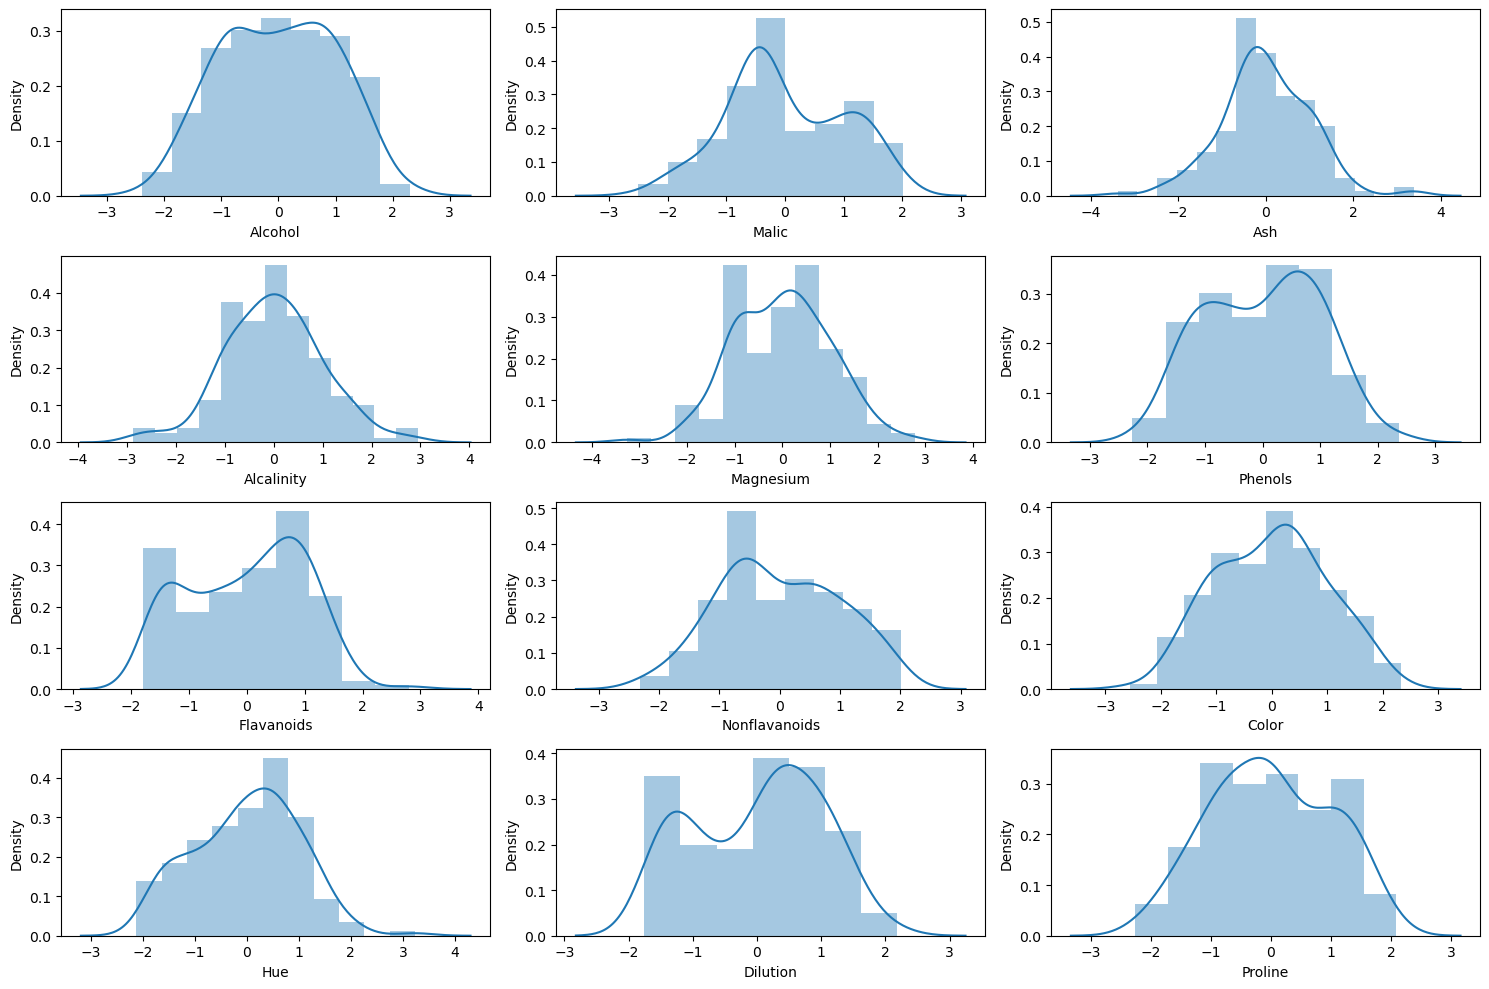

In [10]:
fig, ax = plt.subplots(4, 3, figsize=(15, 10))
sns.distplot(df2.Alcohol, ax=ax[0, 0])
sns.distplot(df2.Malic, ax=ax[0, 1])
sns.distplot(df2.Ash, ax=ax[0, 2])
sns.distplot(df2.Alcalinity, ax=ax[1, 0])
sns.distplot(df2.Magnesium, ax=ax[1, 1])
sns.distplot(df2.Phenols, ax=ax[1, 2])
sns.distplot(df2.Flavanoids, ax=ax[2, 0])
sns.distplot(df2.Nonflavanoids, ax=ax[2, 1])
sns.distplot(df2.Color, ax=ax[2, 2])
sns.distplot(df2.Hue, ax=ax[3, 0])
sns.distplot(df2.Dilution, ax=ax[3, 1])
sns.distplot(df2.Proline, ax=ax[3, 2])

plt.tight_layout()
plt.show()

# Cluster formation

### using average linkage method

Text(0.5, 1.0, 'Dendrogram')

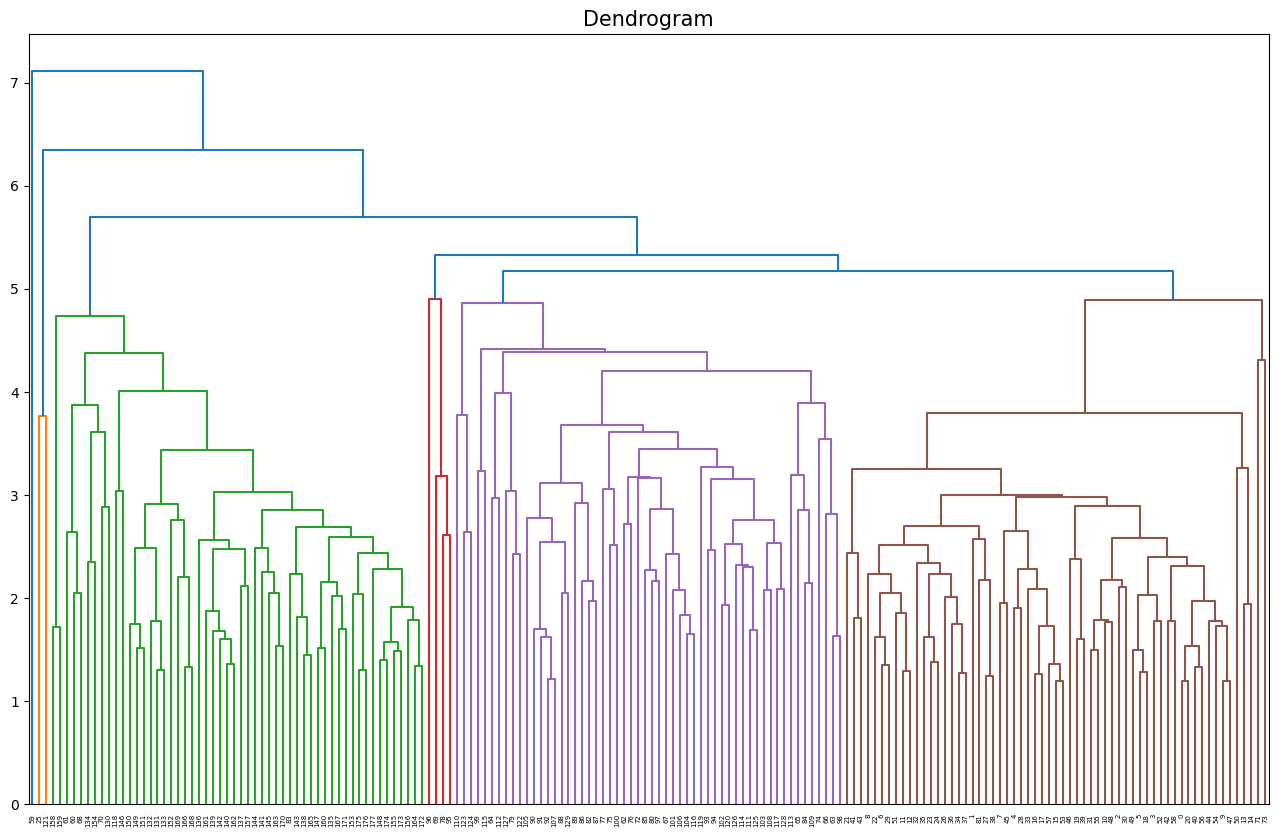

In [11]:
fig = plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(df2_transformed,method='average'))
plt.title('Dendrogram',size=15)

In [12]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')

In [13]:
# Fitting data on model
hc_fit = hc.fit_predict(df2_transformed)
Clusters = pd.DataFrame(hc_fit,columns=['Clusters'])

c:\Users\HOME\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [14]:
df['cluster']=hc_fit
df.groupby('cluster').agg(['mean']).reset_index()

,cluster,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,12.995812,1.988803,2.347350,18.779487,98.239316,2.575470,2.575385,0.321709,1.778974,4.264957,1.063248,3.025214,805.384615
1,1,12.205000,1.455000,2.160000,18.025000,145.750000,1.962500,1.597500,0.237500,2.525000,2.837500,1.112500,2.567500,757.500000
2,2,12.305000,2.050000,3.225000,26.750000,121.500000,2.905000,3.880000,0.470000,1.895000,4.790000,1.030000,3.445000,647.500000
3,3,12.370000,0.940000,1.360000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.950000,1.050000,1.820000,520.000000
4,4,13.107407,3.191111,2.410185,21.050000,99.000000,1.695556,0.836481,0.455556,1.124630,7.008519,0.712333,1.702778,627.259259


In [15]:
for i in range(5):
    print('cluster', i)
    print('Total Members in hierarchy:', len(list(df[df['cluster'] == i]['cluster'].values)))
    print()


cluster 0
Total Members in hierarchy: 117

cluster 1
Total Members in hierarchy: 4

cluster 2
Total Members in hierarchy: 2

cluster 3
Total Members in hierarchy: 1

cluster 4
Total Members in hierarchy: 54



### Using centroid linkage

Text(0.5, 1.0, 'Dendrogram')

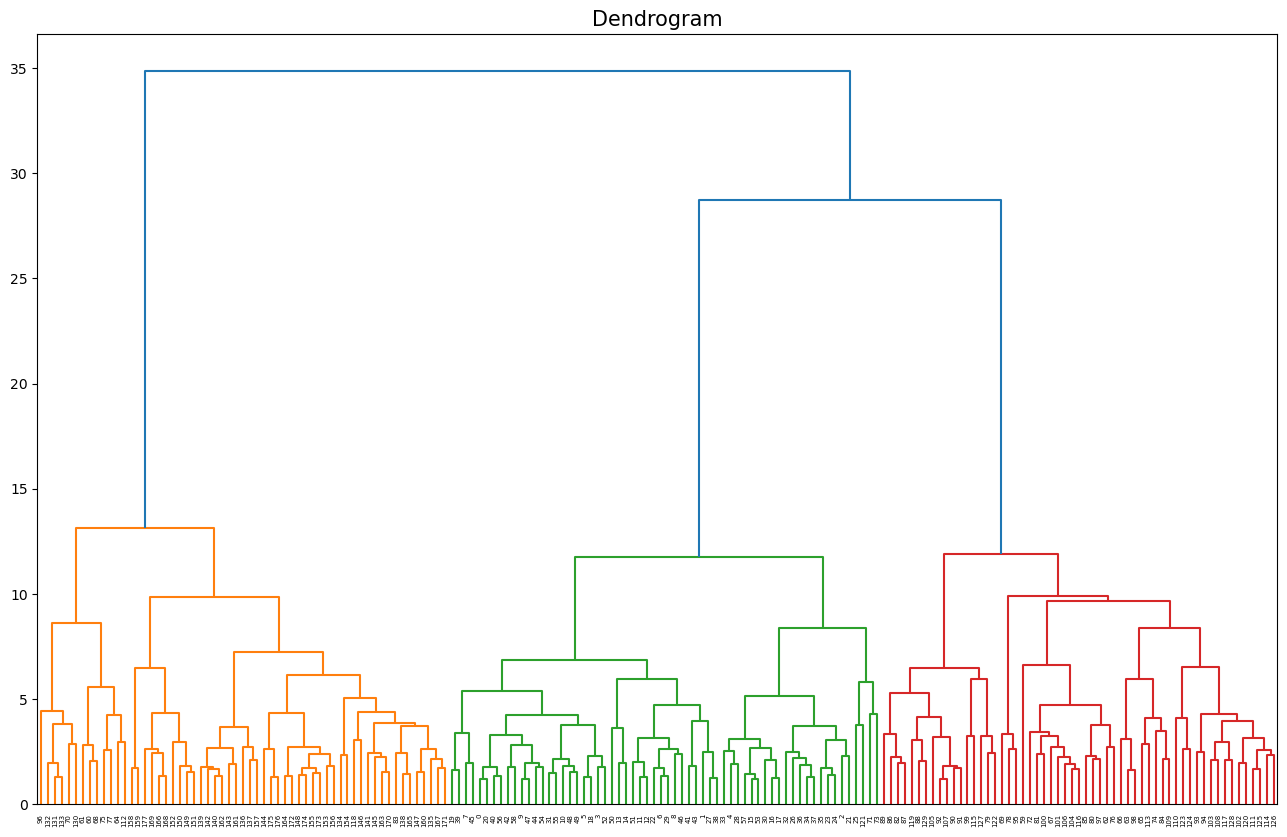

In [16]:
fig = plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(df2_transformed,method='ward'))
plt.title('Dendrogram',size=15)

In [17]:
#cluster formation
hc1 = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [18]:
# fitting data on model
hc1_fit = hc1.fit_predict(df2_transformed)
Clusters1 = pd.DataFrame(hc1_fit,columns=['Clusters'])

c:\Users\HOME\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [19]:
df['cluster']=hc1_fit
df.groupby('cluster').agg(['mean']).reset_index()

,cluster,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,13.699194,1.997742,2.473871,17.559677,106.741935,2.854839,3.012742,0.290323,1.899355,5.466129,1.068710,3.171935,1091.725806
1,1,13.172826,3.415435,2.430435,21.369565,97.869565,1.700000,0.773696,0.470217,1.182174,7.456956,0.681957,1.730000,626.130435
2,2,12.298250,1.721500,2.123000,19.200000,94.350000,2.437250,2.253750,0.294500,1.763000,3.117750,1.026250,2.944000,510.050000
3,3,12.391538,2.017692,2.360769,19.092308,107.230769,1.686923,1.326154,0.379231,0.930000,3.933846,0.993538,1.847692,583.461538
4,4,12.105294,2.341765,2.379412,22.482353,86.235294,1.994706,1.849412,0.474706,1.672353,2.504118,1.107647,2.756471,498.294118


In [20]:
for i in range(5):
    print('cluster', i)
    print('Total Members in hierarchy:', len(list(df[df['cluster'] == i]['cluster'].values)))
    print()


cluster 0
Total Members in hierarchy: 62

cluster 1
Total Members in hierarchy: 46

cluster 2
Total Members in hierarchy: 40

cluster 3
Total Members in hierarchy: 13

cluster 4
Total Members in hierarchy: 17



### Using complete linkage

Text(0.5, 1.0, 'Dendrogram')

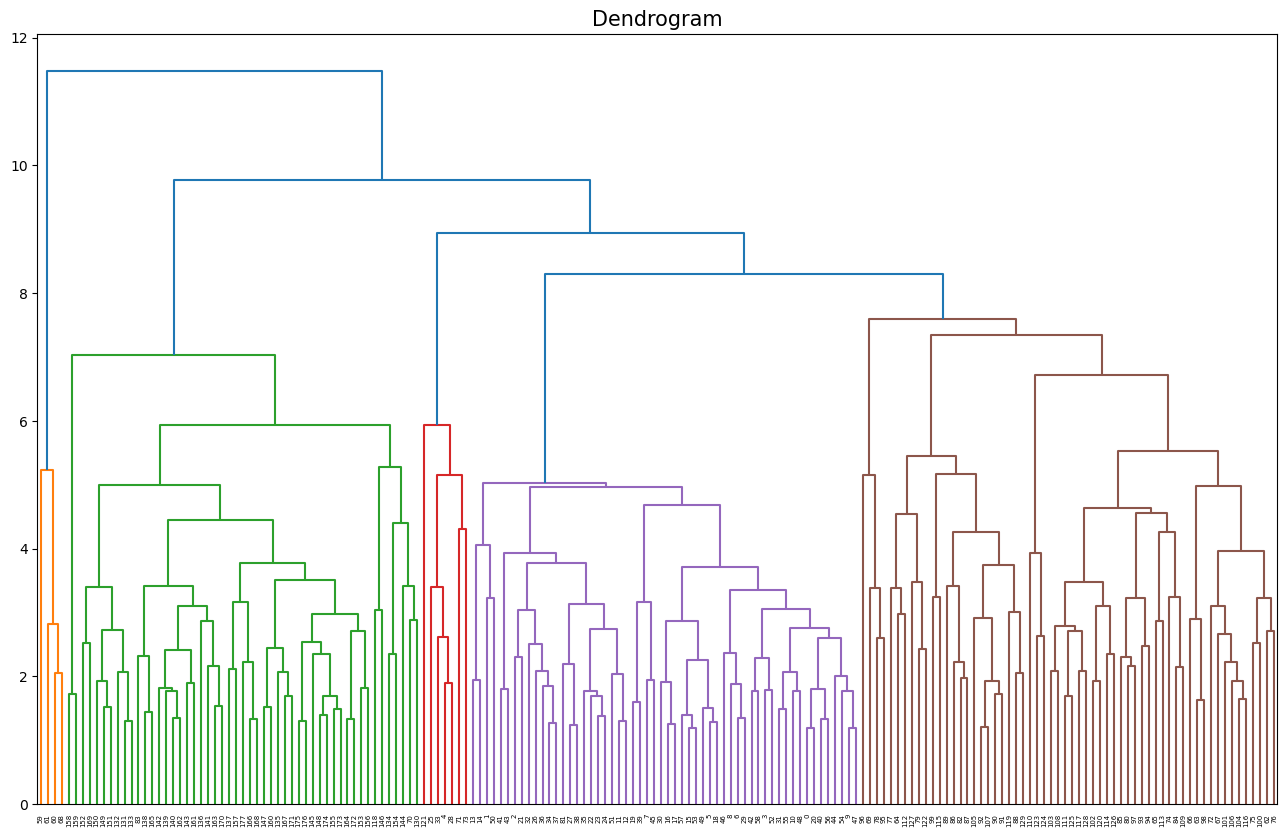

In [21]:
fig = plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(df2_transformed,method='complete'))
plt.title('Dendrogram',size=15)

In [22]:
#cluster formation
hc2 = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [23]:
# fitting data on model
hc2_fit = hc2.fit_predict(df2_transformed)
Clusters2 = pd.DataFrame(hc2_fit,columns=['Clusters'])

c:\Users\HOME\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [24]:
df['cluster']=hc2_fit
df.groupby('cluster').agg(['mean']).reset_index()

,cluster,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,12.197833,1.949000,2.235833,20.255000,93.600000,2.263167,2.102500,0.354500,1.708333,2.952167,1.058167,2.855167,502.566667
1,1,13.190000,1.900000,2.870000,24.057143,117.857143,2.965714,3.130000,0.374286,1.792857,4.361429,1.181429,3.268571,796.428571
2,2,13.127255,3.312157,2.421373,21.311765,98.725490,1.665882,0.811176,0.448824,1.162353,7.181765,0.690510,1.701176,627.294118
3,3,12.670000,1.085000,2.005000,15.100000,99.750000,2.145000,1.092500,0.497500,0.467500,3.535000,1.075000,1.752500,600.000000
4,4,13.745357,2.006607,2.419464,16.769643,104.982143,2.829286,2.989464,0.279286,1.910357,5.576250,1.056250,3.159286,1121.892857


In [25]:
for i in range(5):
    print('cluster', i)
    print('Total Members in hierarchy:', len(list(df[df['cluster'] == i]['cluster'].values)))
    print()


cluster 0
Total Members in hierarchy: 60

cluster 1
Total Members in hierarchy: 7

cluster 2
Total Members in hierarchy: 51

cluster 3
Total Members in hierarchy: 4

cluster 4
Total Members in hierarchy: 56



### Using single linkage

Text(0.5, 1.0, 'Dendrogram')

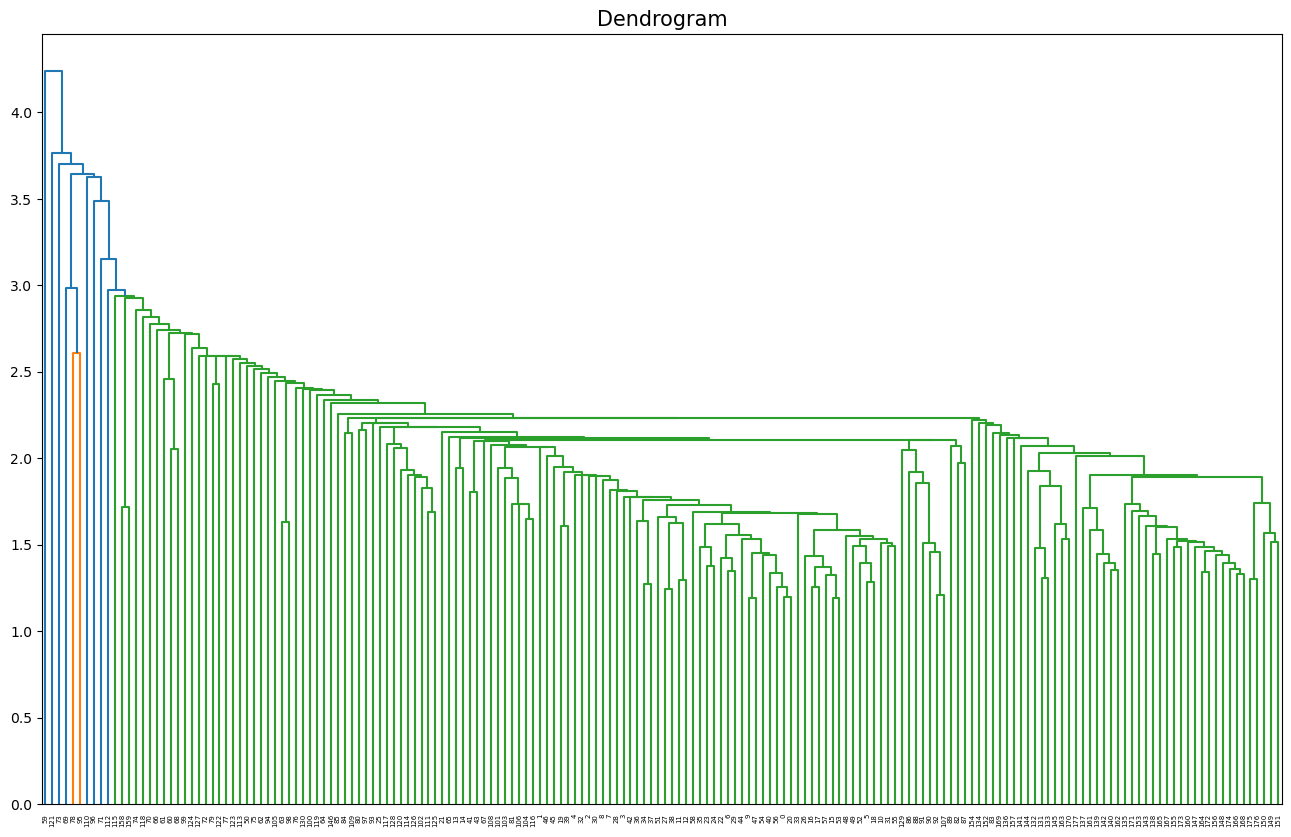

In [26]:
fig = plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(df2_transformed,method='single'))
plt.title('Dendrogram',size=15)

In [27]:
#cluster formation
hc3 = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single')

In [28]:
# fitting data on model
hc3_fit = hc3.fit_predict(df2_transformed)
Clusters3 = pd.DataFrame(hc3_fit,columns=['Clusters'])

c:\Users\HOME\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [29]:
df['cluster']=hc3_fit
df.groupby('cluster').agg(['mean']).reset_index()

,cluster,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,13.024302,2.369244,2.372965,19.479070,98.598837,2.289651,2.019012,0.364186,1.572035,5.117384,0.951372,2.603837,747.511628
1,1,12.336667,1.233333,1.966667,16.866667,149.666667,2.083333,1.800000,0.270000,2.846667,2.950000,1.166667,2.670000,801.666667
2,2,11.560000,2.050000,3.230000,28.500000,119.000000,3.180000,5.080000,0.470000,1.870000,6.000000,0.930000,3.690000,465.000000
3,3,12.370000,0.940000,1.360000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.950000,1.050000,1.820000,520.000000
4,4,12.990000,1.670000,2.600000,30.000000,139.000000,3.300000,2.890000,0.210000,1.960000,3.350000,1.310000,3.500000,985.000000


In [30]:
for i in range(5):
    print('cluster', i)
    print('Total Members in hierarchy:', len(list(df[df['cluster'] == i]['cluster'].values)))
    print()


cluster 0
Total Members in hierarchy: 172

cluster 1
Total Members in hierarchy: 3

cluster 2
Total Members in hierarchy: 1

cluster 3
Total Members in hierarchy: 1

cluster 4
Total Members in hierarchy: 1



c:\Users\HOME\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HOME\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HOME\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HOME\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

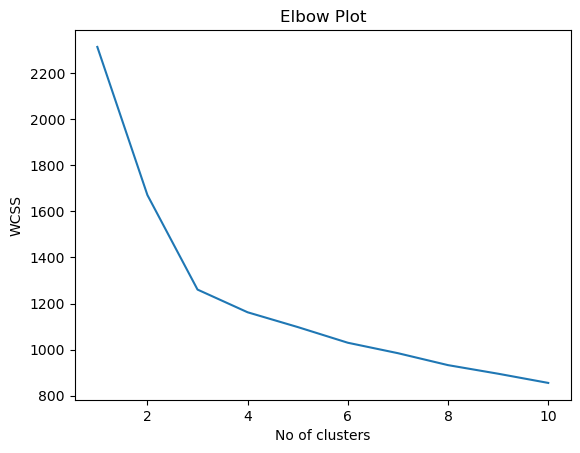

In [31]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df2_transformed)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Plot')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
new_clusters = KMeans(n_clusters=3, random_state=42)

# Fit KMeans to the transformed DataFrame
new_clusters.fit(df2_transformed)

c:\Users\HOME\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HOME\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [33]:
KM_labels = new_clusters.labels_

# Assign cluster labels to a new column in the DataFrame
df['cluster'] = new_clusters.labels_

# Get the cluster centers
new_clusters.cluster_centers_

array([[-0.92471151, -0.49647548, -0.48445741,  0.17321329, -0.59073256,
        -0.03456885,  0.06453848, -0.03330114,  0.06440464, -1.00713852,
         0.47268867,  0.26299467, -0.8306802 ],
       [ 0.14011685,  0.82894762,  0.16217016,  0.52642276, -0.01455062,
        -1.01055636, -1.23416399,  0.68765693, -0.79560655,  0.86148209,
        -1.15144802, -1.25949031, -0.26131592],
       [ 0.83702355, -0.18275557,  0.36407139, -0.62031667,  0.62199219,
         0.88324737,  0.96848491, -0.54236915,  0.60080071,  0.31709349,
         0.47779391,  0.78486835,  1.07664453]])

In [34]:
cluster_means = df.groupby('cluster').mean().reset_index()
cluster_means

,cluster,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0,12.250312,1.901875,2.231562,20.057813,92.578125,2.265625,2.066094,0.357500,1.626719,2.971875,1.065156,2.818750,504.546875
1,1,13.117885,3.274615,2.413654,21.225000,98.750000,1.672692,0.822692,0.450385,1.151923,7.154231,0.696077,1.699038,623.884615
2,2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806


In [35]:
for i in range(3):
    print('cluster', i)
    print('Total Members in hierarchy:', len(list(df[df['cluster'] == i]['cluster'].values)))
    print()


cluster 0
Total Members in hierarchy: 64

cluster 1
Total Members in hierarchy: 52

cluster 2
Total Members in hierarchy: 62



## Principle Component Analysis

In [36]:
pca = PCA()
pca_values = pca.fit_transform(df2_transformed)
pca_values

array([[-3.35015641, -1.47445705, -0.19843072, ..., -0.77122634,
         0.60294436, -0.20272317],
       [-2.26361472,  0.09403269, -2.11492129, ..., -0.29002971,
         0.26085755, -0.02953532],
       [-2.36285431, -1.14248825,  1.09669227, ..., -0.27731812,
         0.08845308,  0.02903915],
       ...,
       [ 2.47867652, -2.67660153, -0.85364851, ...,  0.40083706,
         0.45559738, -0.03085894],
       [ 2.31649378, -2.37278689, -0.54800264, ...,  0.03425603,
         0.30360826, -0.0862447 ],
       [ 2.92611779, -2.68059448,  1.10986281, ..., -0.09820916,
        -0.33333677, -0.36958726]])

In [37]:
pca = PCA(n_components=13)
pca_values = pca.fit_transform(df2_transformed)

In [38]:
var = pca.explained_variance_ratio_
var

array([0.35092919, 0.21004172, 0.11366632, 0.06972261, 0.06189444,
       0.04586695, 0.03955289, 0.02780707, 0.02385683, 0.01912577,
       0.01702088, 0.01274336, 0.00777195])

In [39]:
#Cumulative variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 35.09,  56.09,  67.46,  74.43,  80.62,  85.21,  89.17,  91.95,
        94.34,  96.25,  97.95,  99.22, 100.  ])

In [40]:
pca.components_

array([[-0.15298815,  0.22325282, -0.00249122,  0.24571233, -0.14614977,
        -0.40421188, -0.43011977,  0.30058631, -0.32600772,  0.04883817,
        -0.29633376, -0.37873121, -0.25759013],
       [-0.45476476, -0.26665543, -0.30182916,  0.01887899, -0.34184461,
        -0.03706904,  0.02742526, -0.02576553, -0.00834422, -0.52282794,
         0.26564624,  0.15084933, -0.379785  ],
       [-0.19404836,  0.16656644,  0.61508905,  0.60110552,  0.10105442,
         0.15405395,  0.15870503,  0.15846746,  0.18756579, -0.14564323,
         0.05836363,  0.17530458, -0.14199911],
       [ 0.00742656,  0.52092766, -0.27450202,  0.03395941, -0.27474899,
         0.12175982,  0.11087775, -0.28560076,  0.37493527,  0.05144446,
        -0.48526922,  0.17805236, -0.23976788],
       [-0.30308899, -0.00751511, -0.06005818,  0.07519356,  0.68386298,
        -0.16894046, -0.10784785, -0.58633401, -0.03802376, -0.12666374,
        -0.11509799, -0.09210617, -0.08927899],
       [-0.16039822, -0.592714

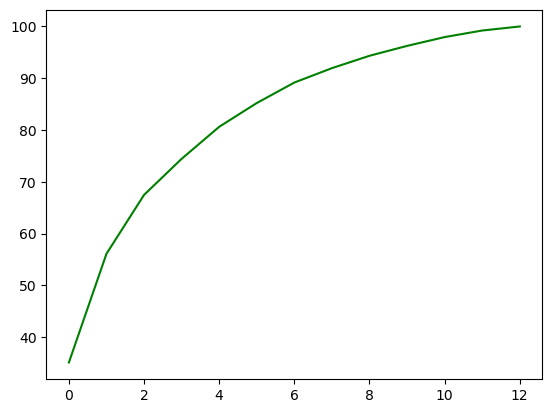

In [42]:
# Variance plot for PCA component obtained
plt.plot(var1,color='green')